In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("blogs.csv", encoding="ISO-8859-1")

# Explore the data
print(data.head())  # Display the first few rows
print(data.info())  # Get information about data types and missing values
print(data.describe())  # Get descriptive statistics

                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
                                                     Data       Labels
count                                                2000         2000
unique                                               2000           20
top     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
freq                    

In [ ]:
print(data.columns)

Index(['Data', 'Labels'], dtype='object')


In [ ]:
data

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [ ]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)


In [ ]:
data['Data'] = data.Data.apply(clean)
data.Data

,Data
0,path \nfrom frank odwyer\nnewsgroups altathei...
1,newsgroups altatheism\npath \nfrom bilokcforum...
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,path \nfrom jbrownbatmanbmdtrwcom\nnewsgroups ...
4,xref cantaloupesrvcscmuedu \nnewsgroups alta...
...,...
1995,xref cantaloupesrvcscmuedu \npath \nfrom fr...
1996,xref cantaloupesrvcscmuedu \nnewsgroups talk...
1997,xref cantaloupesrvcscmuedu \npath cantaloupes...
1998,xref cantaloupesrvcscmuedu \npath cantaloupes...


In [ ]:
#Word frequency
freq = pd.Series(' '.join(data['Data']).split()).value_counts()[:20] # for top 20
freq

,count
the,26780
to,13429
of,12697
a,11214
and,10863
in,9068
i,8155
is,7970
that,7092
it,5509


In [ ]:
import nltk
nltk.download('stopwords')

#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Data'] = data['Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data["Data"])
# Use get_feature_names_out() instead of get_feature_names()
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

In [ ]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(data['Data']).split()).value_counts()[:20] # for top 20
freq_Sw

,count
subject,2170
lines,2086
date,2083
path,2046
newsgroups,2038
messageid,2006
organization,1979
apr,1940
gmt,1785
one,1588


In [ ]:
word_freq_df.head(30)

,term,occurrences,frequency
0,aa,9,0.000029
1,aaa,3,0.000010
2,aaaaarrrrgh,1,0.000003
3,aaboston,1,0.000003
4,aalternate,1,0.000003
5,aaltonen,3,0.000010
6,aam,1,0.000003
7,aan,6,0.000019
8,aangegeven,1,0.000003
9,aantal,1,0.000003


In [ ]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["Data"])
# Use get_feature_names_out() instead of get_feature_names()
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [ ]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [ ]:
top2_words = get_top_n2_words(data["Data"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,apr gmt,1624
1,date apr,839
2,gmt lines,728
3,messageid date,617
4,xref cantaloupesrvcscmuedu,574


<ipython-input-19-8ad2e7024b98>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])


[Text(0, 0, 'apr gmt'),
 Text(1, 0, 'date apr'),
 Text(2, 0, 'gmt lines'),
 Text(3, 0, 'messageid date'),
 Text(4, 0, 'xref cantaloupesrvcscmuedu'),
 Text(5, 0, 'lines article'),
 Text(6, 0, 'references date'),
 Text(7, 0, 'messageid sender'),
 Text(8, 0, 'organization university'),
 Text(9, 0, 'writes article'),
 Text(10, 0, 'cantaloupesrvcscmuedu newsgroups'),
 Text(11, 0, 'cantaloupesrvcscmuedu path'),
 Text(12, 0, 'gmt organization'),
 Text(13, 0, 'messageid references'),
 Text(14, 0, 'gmt references'),
 Text(15, 0, 'references nntppostinghost'),
 Text(16, 0, 'fri apr'),
 Text(17, 0, 'tue apr'),
 Text(18, 0, 'date thu'),
 Text(19, 0, 'date tue')]

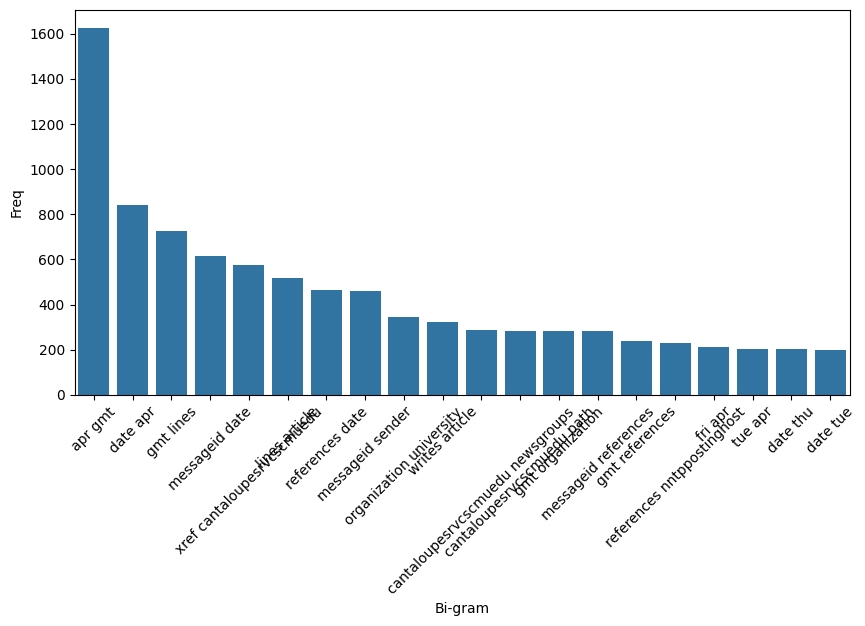

In [ ]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [ ]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [ ]:
top3_words = get_top_n3_words(data["Data"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [ ]:
top3_df

,Tri-gram,Freq
0,date apr gmt,676
1,apr gmt lines,670
2,messageid date apr,452
3,gmt lines article,291
4,xref cantaloupesrvcscmuedu newsgroups,289
...,...,...
195,system organization university,15
196,computer science department,15
197,christian morality messageid,15
198,lines nntppostinghost article,15


<ipython-input-23-785b9243dc80>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])


[Text(0, 0, 'date apr gmt'),
 Text(1, 0, 'apr gmt lines'),
 Text(2, 0, 'messageid date apr'),
 Text(3, 0, 'gmt lines article'),
 Text(4, 0, 'xref cantaloupesrvcscmuedu newsgroups'),
 Text(5, 0, 'xref cantaloupesrvcscmuedu path'),
 Text(6, 0, 'apr gmt organization'),
 Text(7, 0, 'apr gmt references'),
 Text(8, 0, 'messageid references nntppostinghost'),
 Text(9, 0, 'date fri apr'),
 Text(10, 0, 'fri apr gmt'),
 Text(11, 0, 'date tue apr'),
 Text(12, 0, 'date thu apr'),
 Text(13, 0, 'tue apr gmt'),
 Text(14, 0, 'thu apr gmt'),
 Text(15, 0, 'date wed apr'),
 Text(16, 0, 'wed apr gmt'),
 Text(17, 0, 'date mon apr'),
 Text(18, 0, 'mon apr gmt'),
 Text(19, 0, 'lines messageid references')]

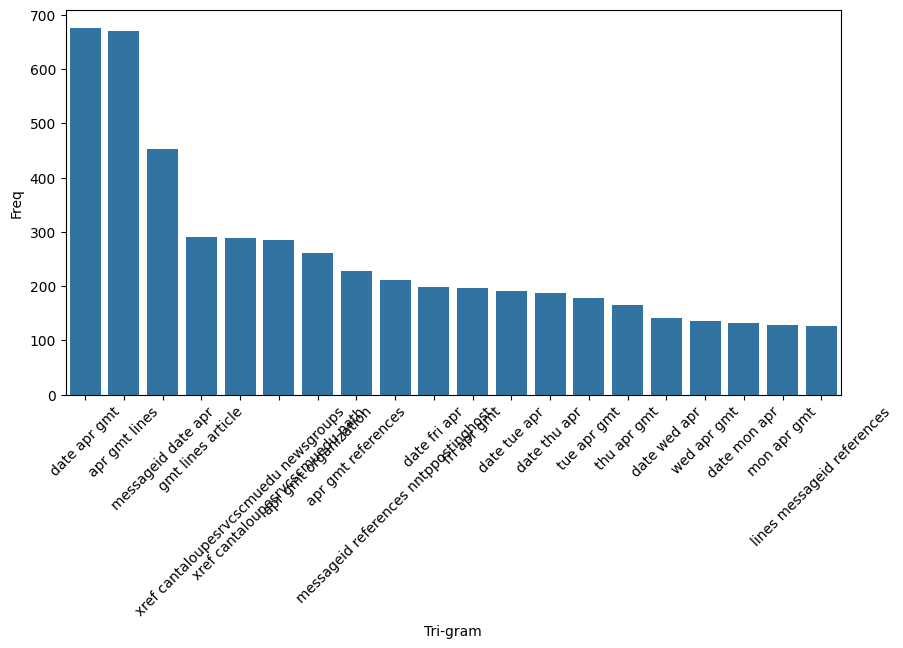

In [ ]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

In [ ]:
string_Total = " ".join(data["Data"])

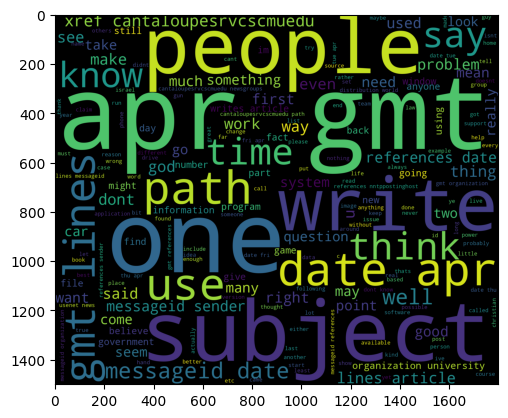

In [ ]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

In [ ]:
data.head()

,Data,Labels
0,path frank odwyer newsgroups altatheism subjec...,alt.atheism
1,newsgroups altatheism path bilokcforumosrheedu...,alt.atheism
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism
3,path jbrownbatmanbmdtrwcom newsgroups altathei...,alt.atheism
4,xref cantaloupesrvcscmuedu newsgroups altathei...,alt.atheism


In [ ]:
def split_into_words(i):
    return (i.split(" "))


In [ ]:
from sklearn.model_selection import train_test_split

email_train,email_test = train_test_split(data,test_size=0.3)

In [ ]:
email_test

,Data,Labels
624,path cantaloupesrvcscmuedurochestercornellbatc...,misc.forsale
152,path johngoshawkmccacuk john heaton newsgroups...,comp.graphics
1815,xref cantaloupesrvcscmuedu path cantaloupesrvc...,talk.politics.misc
1984,xref cantaloupesrvcscmuedu path frank odwyer n...,talk.religion.misc
1999,xref cantaloupesrvcscmuedu path riggsdescartes...,talk.religion.misc
...,...,...
1573,path kilroygbororowanedu newsgroups socreligio...,soc.religion.christian
1816,newsgroups talkpoliticsmisccapoliticsbapolitic...,talk.politics.misc
842,path cantaloupesrvcscmuedudasnewsharvardedunoc...,rec.motorcycles
1543,xref cantaloupesrvcscmuedu path crepslateranuc...,soc.religion.christian


In [ ]:
# Preparing email texts into word count matrix format
emails_bow = CountVectorizer(analyzer=split_into_words).fit(data.Data)

In [ ]:
# For all messages
all_emails_matrix = emails_bow.transform(data.Data)
all_emails_matrix.shape

(2000, 39214)

In [ ]:
# For training messages
train_emails_matrix = emails_bow.transform(email_train.Data)
train_emails_matrix.shape # (3891,8175)

# For testing messages
test_emails_matrix = emails_bow.transform(email_test.Data)
test_emails_matrix.shape # (1668,8175)

(600, 39214)

In [ ]:
####### Without TFIDF matrices ########################
# Preparing a naive bayes model on training data set

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_emails_matrix,email_train.Labels)
train_pred_m = classifier_mb.predict(train_emails_matrix)
accuracy_train_m = np.mean(train_pred_m==email_train.Labels) # 98%

test_pred_m = classifier_mb.predict(test_emails_matrix)
accuracy_test_m = np.mean(test_pred_m==email_test.Labels) # 96%


In [ ]:
# Gaussian Naive Bayes
classifier_gb = GB()
classifier_gb.fit(train_emails_matrix.toarray(),email_train.Labels.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_emails_matrix.toarray())
accuracy_train_g = np.mean(train_pred_g==email_train.Labels) # 95%

test_pred_g = classifier_gb.predict(test_emails_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g==email_test.Labels) # 8%

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

# Learning Term weighting and normalizing on entire emails
tfidf_transformer = TfidfTransformer().fit(all_emails_matrix)

# Preparing TFIDF for train emails
train_tfidf = tfidf_transformer.transform(train_emails_matrix)

train_tfidf.shape # (3891, 6661)

# Preparing TFIDF for test emails
test_tfidf = tfidf_transformer.transform(test_emails_matrix)

test_tfidf.shape #  (1668, 6661)

(600, 39214)

In [ ]:
# Preparing a naive bayes model on training data set

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_tfidf,email_train.Labels)
train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m==email_train.Labels) # 96%

test_pred_m = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(test_pred_m==email_test.Labels) # 96%


In [ ]:
accuracy_train_m

0.9907142857142858

In [ ]:
# Gaussian Naive Bayes
classifier_gb = GB()
classifier_gb.fit(train_tfidf.toarray(),email_train.Labels.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_tfidf.toarray())
accuracy_train_g = np.mean(train_pred_g==email_train.Labels) # 95%
test_pred_g = classifier_gb.predict(test_tfidf.toarray())
accuracy_test_g = np.mean(test_pred_g==email_test.Labels) # 88%

# inplace of tfidf we can also use train_emails_matrix and test_emails_matrix instead of term inverse document frequency matrix

In [ ]:
accuracy_test_g

0.6616666666666666

In [ ]:
!pip install textblob==0.17.1
from textblob import TextBlob

In [ ]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [ ]:
data['sentiment'] = data['Data'].apply(analyze_sentiment)


In [ ]:
sentiment_distribution = data['sentiment'].value_counts()
print(sentiment_distribution)

sentiment
positive    1450
negative     547
neutral        3
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have your predictions in 'test_pred_m' and 'test_pred_g' for Multinomial and Gaussian Naive Bayes respectively.

# For Multinomial Naive Bayes
accuracy_m = accuracy_score(email_test.Labels, test_pred_m)
precision_m = precision_score(email_test.Labels, test_pred_m, average='weighted')
recall_m = recall_score(email_test.Labels, test_pred_m, average='weighted')
f1_m = f1_score(email_test.Labels, test_pred_m, average='weighted')

# For Gaussian Naive Bayes
accuracy_g = accuracy_score(email_test.Labels, test_pred_g)
precision_g = precision_score(email_test.Labels, test_pred_g, average='weighted')
recall_g = recall_score(email_test.Labels, test_pred_g, average='weighted')
f1_g = f1_score(email_test.Labels, test_pred_g, average='weighted')
print("Multinomial Naive Bayes:")
print("Accuracy:", accuracy_m)
print("Precision:", precision_m)
print("Recall:", recall_m)
print("F1-score:", f1_m)

print("\nGaussian Naive Bayes:")
print("Accuracy:", accuracy_g)
print("Precision:", precision_g)
print("Recall:", recall_g)
print("F1-score:", f1_g)

Multinomial Naive Bayes:
Accuracy: 0.7866666666666666
Precision: 0.8382901257921822
Recall: 0.7866666666666666
F1-score: 0.7889374294265251

Gaussian Naive Bayes:
Accuracy: 0.6616666666666666
Precision: 0.6909101215644043
Recall: 0.6616666666666666
F1-score: 0.6542356225811723
